In [ ]:
import pandas as pd

centroids = pd.read_csv('centroids_cartesian_10.csv')
centroids

,region,x,y,z
0,AK_10_01,-5096.147673,-2644.830556,2761.121371
1,AL_10_01,129.292531,-3254.223318,5475.669369
2,AL_10_02,261.318458,-3373.292140,5398.356583
3,AL_10_03,143.864717,-3428.938188,5367.618359
4,AL_10_04,220.193974,-3542.082455,5291.011954
...,...,...,...,...
974,WY_10_01,-1116.544629,-4073.069938,4770.017858
975,WY_10_02,-1471.406797,-4174.688536,4582.202382
976,WY_10_03,-1170.617266,-4239.581081,4609.256824
977,WY_10_04,-1223.370697,-4117.859302,4704.916567


## 2D plot in Cartesian coordinates

[]

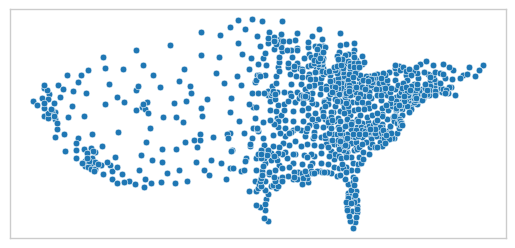

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
# remove outliers
centroids = pd.read_csv('centroids_cartesian_10.csv')
centroids['y'] = -centroids['y']
centroids = centroids[(centroids['y'] > 2000) & (centroids['x'] > -3500)]
sns.scatterplot(data=centroids, x='x', y='y')
# Get the current axes object
ax = plt.gca()
# Set the aspect ratio to 'equal'
ax.set_aspect('equal')
# remove x and y labels
ax.set_xlabel('')
ax.set_ylabel('')
# remove ticks
ax.set_xticks([])
ax.set_yticks([])

## 3D plot in Cartesian coordinates

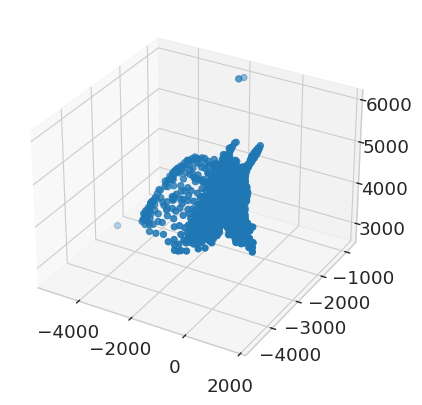

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
centroids = pd.read_csv('centroids_cartesian_10.csv')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Create a scatter plot using Matplotlib
ax.scatter(centroids['x'], centroids['y'], centroids['z'])
plt.show()

In [ ]:
# Create a figure and a 3D axis
import plotly
import plotly.graph_objs as go
centroids = pd.read_csv('centroids_cartesian_10.csv')
trace = go.Scatter3d(
    x=centroids['x'],
    y=centroids['y'],
    z=centroids['z'],
    mode='markers',
    marker=dict(
        size=8,
        colorscale='Viridis',
        opacity=0.8
    )
)
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z'),
        camera=dict(
            eye=dict(x=-1, y=-1, z=-1),
            projection=dict(type='perspective')
      ),
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig

## 3D plot in spherical coordinates on top of a map

In [ ]:
import plotly.graph_objects as go
import numpy as np

centroids = pd.read_csv('centroids_cartesian_10.csv')
x, y, z = centroids['x'], centroids['y'], centroids['z']

x, y, z = x, y, z
lon = np.degrees(np.arctan2(y, x))
lat = np.degrees(np.arccos(z / np.sqrt(x**2 + y**2 + z**2)))

filter_US = False
lon_min = -125.0
lon_max = -66.0
lat_min = 25.0
lat_max = 49.0
if filter_US:
  inside_long = (lon_min <= lon) & (lon <= lon_max)
  inside_lat = (lat_min <= lat) & (lat <= lat_max)
  inside = inside_long & inside_lat
  lon = lon[inside]
  lat = lat[inside]

# Calculate the center of the bounding box
center_lon = (lon_min + lon_max) / 2
center_lat = (lat_min + lat_max) / 2

votes = pd.read_csv('results-2016-election.csv')
population = votes['votes_R'] + votes['votes_D'] + votes['votes_oth']
score = (votes['votes_D']) / population * 100
population_scale = population ** 0.5 / 50
print("Number of points:", len(lon))

score_bis = False
if score_bis:
  score_bis = pd.read_csv('y_pred.csv')
  assert all(score_bis.index == votes.index)
  score = score_bis['perc_D'] * 100

percs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

colorbar=dict(title='Democrat vote',
                    x=1.05, # x=0.74,  # Set the x position of the colorbar (0 to 1)
                    y=0.5,
                    thickness=30,
                    outlinewidth=0,
                    ticktext=[str(perc)+'%' for perc in percs],
                    tickvals=percs)  # Set the y position of the colorbar (0 to 1))  # Add a colorbar

# Create a scattergeo trace
trace = go.Scattergeo(
    lon = lon,
    lat = lat,
    mode = 'markers',
    marker = dict(
        size = population_scale,
        color = score,
        line=dict(
            width=0  # Set the line width to 0 to remove borders
        ),
        opacity = 0.95,
        colorscale='RdBu',  # Choose a colorscale
        # colorscale='Plasma',
        colorbar=colorbar,
    ),
    #projection_type="equirectangular"
)

zoom = 5.5

# Create the layout for the map
layout = go.Layout(
    geo = dict(
        resolution = 50,
        showland = True,
        showocean = True,
        showlakes = True,
        showrivers = True,
        landcolor = 'rgb(243, 243, 243)',  # 'rgb(143,188,143)', # 'rgb(243, 243, 243)',
        # landcolor = 'rgb(143,188,143)',
        countrycolor = 'rgb(0, 0, 0)',
        lakecolor = 'rgb(204, 204, 204)',
        oceancolor = 'rgb(235, 243, 255)', # 'rgb(148, 194, 247)'
        # oceancolor = 'rgb(148, 194, 247)',
        rivercolor = 'rgb(204, 204, 204)',
        projection_scale=zoom,
        center=dict(
            lon=center_lon,
            lat=center_lat,
        )
    ),
    #margin = dict(l=1, r=1, t=1, b=1),
)

# Create the figure and plot the map

fig = go.Figure(data=[trace], layout=layout)
fig

Number of points: 979


In [ ]:
width_in_mm = 210
scale = width_in_mm * 17780.0 # dpi=300
fig.write_image('fig.svg', format="svg", width = 300)